In [1]:
from sklearn.preprocessing import LabelEncoder

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


In [5]:
from sklearn.model_selection import RandomizedSearchCV

In [7]:
df=pd.read_csv("resortworldwide.csv")

In [ ]:
df.head()


,URL,Rate,NameResort,Stars,Km Freeride,Continent,Country,State/Province,Altitude,Easy,...,Après-ski,Accommodation offering directly at the slopes and lifts,Families and children,Beginners,Snow parks,Cross-country skiing and trails,country,latitude,longitude,Total Kms
0,http://www.skiresort.info/ski-resort/kitzski-k...,4.9,KitzSki – Kitzbühel/Kirchberg,5.0,45.0,Europe,Austria,Tyrol (Tirol),2000.0,101.0,...,"4,0","5,0","5,0","5,0","5,0","5,0",AT,47.516231,14.550072,179
1,http://www.skiresort.info/ski-resort/ischglsam...,4.8,Ischgl/Samnaun – Silvretta Arena,5.0,15.0,Europe,Austria,Tyrol (Tirol),2872.0,47.0,...,"5,0","5,0","4,0","4,0","5,0","4,0",AT,47.516231,14.550072,238
2,http://www.skiresort.info/ski-resort/skiwelt-w...,4.8,SkiWelt Wilder Kaiser-Brixental,5.0,26.0,Europe,Austria,Tyrol (Tirol),1957.0,122.0,...,"4,0","4,0","5,0","5,0","5,0","5,0",AT,47.516231,14.550072,284
3,http://www.skiresort.info/ski-resort/st-antons...,4.8,Ski Arlberg,5.0,200.0,Europe,Austria,Tyrol (Tirol),2811.0,132.0,...,"5,0","5,0","5,0","5,0","4,0","4,0",AT,47.516231,14.550072,305
4,http://www.skiresort.info/ski-resort/serfaus-f...,4.8,Serfaus-Fiss-Ladis,5.0,28.0,Europe,Austria,Tyrol (Tirol),2820.0,47.0,...,"4,0","4,0","5,0","4,0","5,0","4,0",AT,47.516231,14.550072,198


In [8]:
df.shape

(5478, 33)

In [9]:
cols={'km Freeride':'Freeridekm','Intermediate':'Intermediate','Ski resort size':'ResortSize','Slope offering,variety of runs':'OfferingRuns',
       'Lifts and cable cars':'LifeCable','Snow reliability':'Reliability','Access, On-Site parking':'AccessParking',
      'Orientation(trail map,information boards,sign-postings)':'Orientation','Cleanliness and hygiene':'Cleanliness',
      'Environmentally friendly ski operation':'EnvironmentFriendly','Mountain restaurants,ski hunts,gastronomy':'Amenities',
      'Apres-ski':'ApresSki','Accomidation offering directly at the slops and lifts':'Accomdation','Families and children':'Family',
      'Begineers':'Begineers','Snow parks':'SnowParks','Cross-country skiing and trails':'SkiTrails'}

In [10]:
df.rename(columns=cols,inplace=True)

In [11]:
df.head(5)

,URL,Rate,NameResort,Stars,Km Freeride,Continent,Country,State/Province,Altitude,Easy,...,Après-ski,Accommodation offering directly at the slopes and lifts,Families and children,Beginners,Snow parks,Cross-country skiing and trails,country,latitude,longitude,Total Kms
0,http://www.skiresort.info/ski-resort/kitzski-k...,4.9,KitzSki – Kitzbühel/Kirchberg,5.0,45.0,Europe,Austria,Tyrol (Tirol),2000.0,101.0,...,"4,0","5,0","5,0","5,0","5,0","5,0",AT,47.516231,14.550072,179
1,http://www.skiresort.info/ski-resort/ischglsam...,4.8,Ischgl/Samnaun – Silvretta Arena,5.0,15.0,Europe,Austria,Tyrol (Tirol),2872.0,47.0,...,"5,0","5,0","4,0","4,0","5,0","4,0",AT,47.516231,14.550072,238
2,http://www.skiresort.info/ski-resort/skiwelt-w...,4.8,SkiWelt Wilder Kaiser-Brixental,5.0,26.0,Europe,Austria,Tyrol (Tirol),1957.0,122.0,...,"4,0","4,0","5,0","5,0","5,0","5,0",AT,47.516231,14.550072,284
3,http://www.skiresort.info/ski-resort/st-antons...,4.8,Ski Arlberg,5.0,200.0,Europe,Austria,Tyrol (Tirol),2811.0,132.0,...,"5,0","5,0","5,0","5,0","4,0","4,0",AT,47.516231,14.550072,305
4,http://www.skiresort.info/ski-resort/serfaus-f...,4.8,Serfaus-Fiss-Ladis,5.0,28.0,Europe,Austria,Tyrol (Tirol),2820.0,47.0,...,"4,0","4,0","5,0","4,0","5,0","4,0",AT,47.516231,14.550072,198


In [12]:
print('Columns after renaming')
print(df.columns)

Columns after renaming
Index(['URL', 'Rate', 'NameResort', 'Stars', 'Km Freeride', 'Continent',
       'Country', 'State/Province', 'Altitude', 'Easy', 'Intermediate ',
       'Difficult', 'Adult', 'Currency', 'Ski resort size ',
       'Slope offering, variety of runs ', 'Lifts and cable cars ',
       'Snow reliability ', 'Access, on-site parking ',
       'Orientation (trail map, information boards, sign-postings) ',
       'Cleanliness and hygiene ', 'Environmentally friendly ski operation ',
       'Mountain restaurants, ski huts, gastronomy ', 'Après-ski ',
       'Accommodation offering directly at the slopes and lifts ',
       'Families and children ', 'Beginners ', 'Snow parks ',
       'Cross-country skiing and trails ', 'country', 'latitude', 'longitude',
       'Total Kms'],
      dtype='object')


In [13]:
print(df.columns)
df['NameResort']=df['NameResort'].str.replace(',','.')
df['Continent']=df['Continent'].str.replace(',','.')
df['Country']=df['Country'].str.replace(',','.')
df['State/Province']=df['State/Province'].str.replace(',','.')
df['Beginners ']=df['Beginners '].str.replace(',','.')
df['Snow parks ']=df['Snow parks '].str.replace(',','.')




Index(['URL', 'Rate', 'NameResort', 'Stars', 'Km Freeride', 'Continent',
       'Country', 'State/Province', 'Altitude', 'Easy', 'Intermediate ',
       'Difficult', 'Adult', 'Currency', 'Ski resort size ',
       'Slope offering, variety of runs ', 'Lifts and cable cars ',
       'Snow reliability ', 'Access, on-site parking ',
       'Orientation (trail map, information boards, sign-postings) ',
       'Cleanliness and hygiene ', 'Environmentally friendly ski operation ',
       'Mountain restaurants, ski huts, gastronomy ', 'Après-ski ',
       'Accommodation offering directly at the slopes and lifts ',
       'Families and children ', 'Beginners ', 'Snow parks ',
       'Cross-country skiing and trails ', 'country', 'latitude', 'longitude',
       'Total Kms'],
      dtype='object')


Dropp unnecessary columns

In [14]:
df.drop(['URL','country','Adult'],axis=1,inplace=True)

Handling duplicate Values

In [15]:
#checking for duplicate values
df.duplicated().sum()

0

Handling Null Values

In [16]:
#checking for null values
df.isna().sum()

Rate                                                           2007
NameResort                                                        0
Stars                                                          5065
Km Freeride                                                    4998
Continent                                                         9
Country                                                           9
State/Province                                                    9
Altitude                                                          9
Easy                                                              0
Intermediate                                                      0
Difficult                                                         0
Currency                                                          9
Ski resort size                                                2026
Slope offering, variety of runs                                2026
Lifts and cable cars                            

In [17]:
df['Continent'].fillna(method='ffill',inplace=True)
df['Country'].fillna(method='ffill',inplace=True)
df['State/Province'].fillna(method='ffill',inplace=True)

C:\Users\Suchita\AppData\Local\Temp\ipykernel_13300\1661189249.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Continent'].fillna(method='ffill',inplace=True)
C:\Users\Suchita\AppData\Local\Temp\ipykernel_13300\1661189249.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Country'].fillna(method='ffill',inplace=True)
C:\Users\Suchita\AppData\Local\Temp\ipykernel_13300\1661189249.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['State/Province'].fillna(method='ffill',inplace=True)


In [18]:
!pip install pandas



In [19]:
import pandas as pd

In [20]:
for col in cols:
  if col in df.columns:  # Check if the column exists in the DataFrame
    if df[col].dtype == 'object':  # Check if the column is of object type (likely string)
        df[col] = df[col].str.replace(',', '.', regex=True)  # Replace commas with periods
        try:
            df[col] = df[col].astype(float)  # Convert to float if possible
        except:
            pass  # Handle cases where conversion to float fails (non-numeric values remain)
    average = df.groupby('Country')[col].transform('mean').fillna(df[col].mean())
    df[col] = df[col].fillna(average)
else: # Align the 'else' statement with the 'for' statement
    print(f"Warning: Column '{col}' not found in DataFrame.")





In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 30 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Rate                                                         3471 non-null   float64
 1   NameResort                                                   5478 non-null   object 
 2   Stars                                                        413 non-null    float64
 3   Km Freeride                                                  480 non-null    float64
 4   Continent                                                    5478 non-null   object 
 5   Country                                                      5478 non-null   object 
 6   State/Province                                               5478 non-null   object 
 7   Altitude                                                     5469 non-null   f

Univariate Analysis

c:\Users\Suchita\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\Suchita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Suchita\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\Suchita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Use

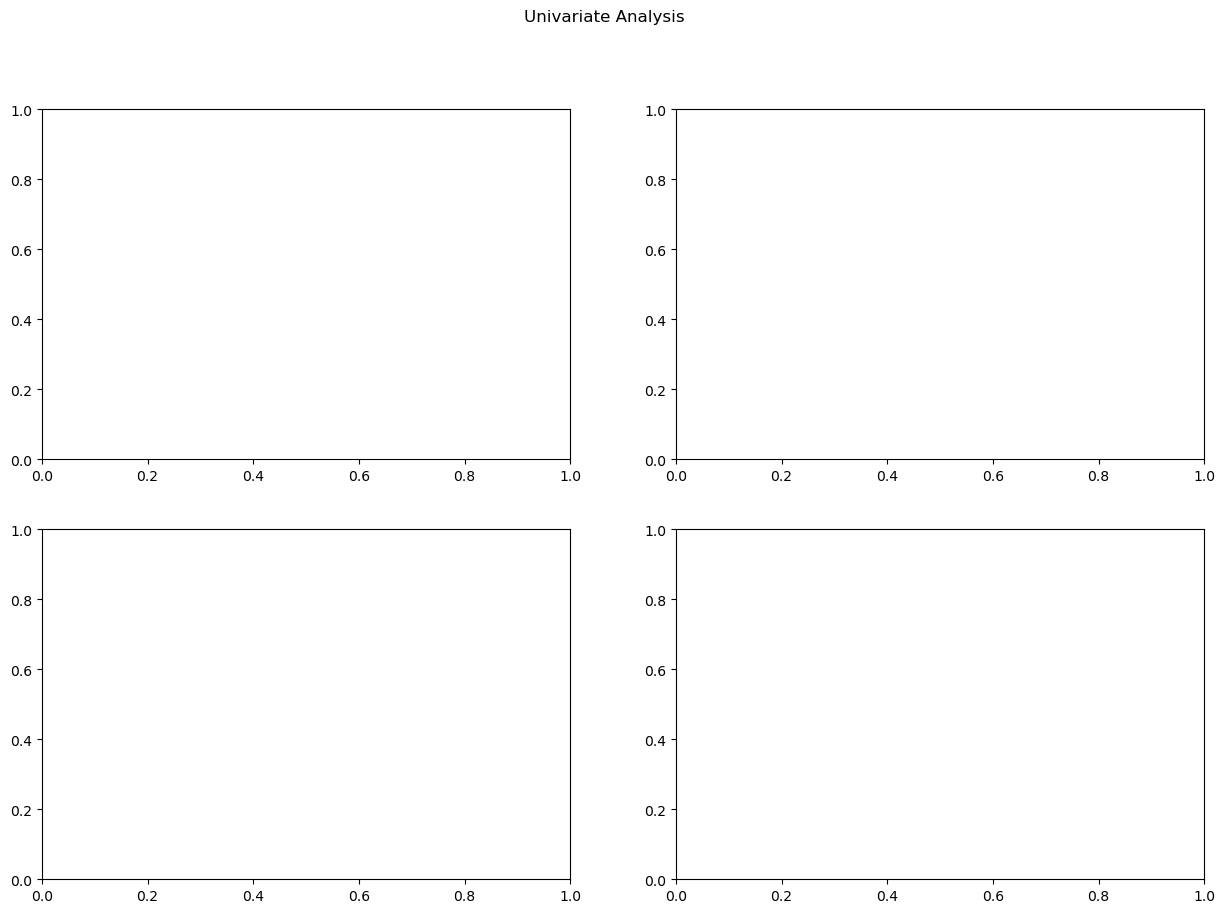

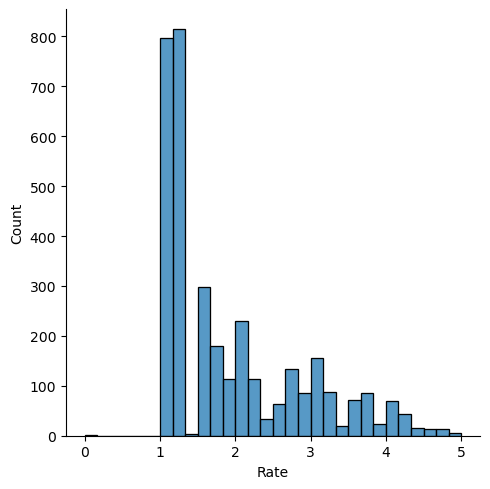

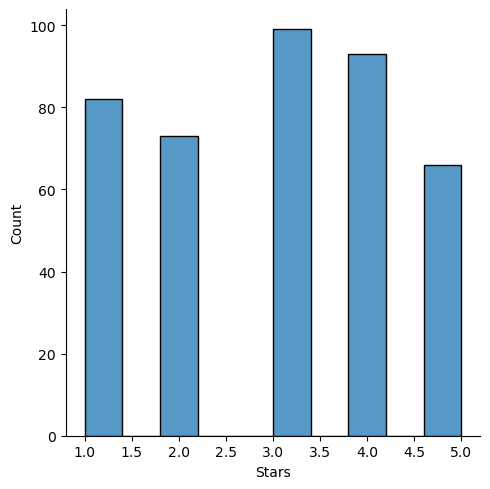

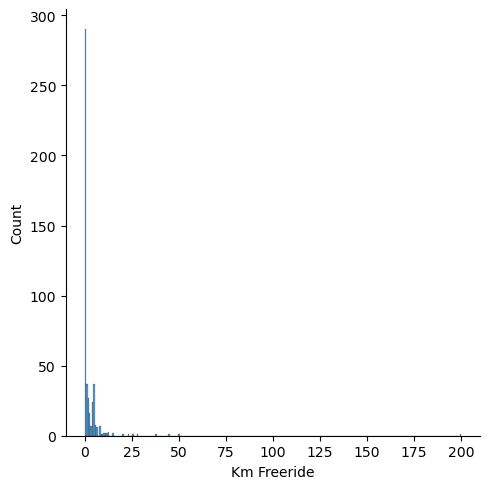

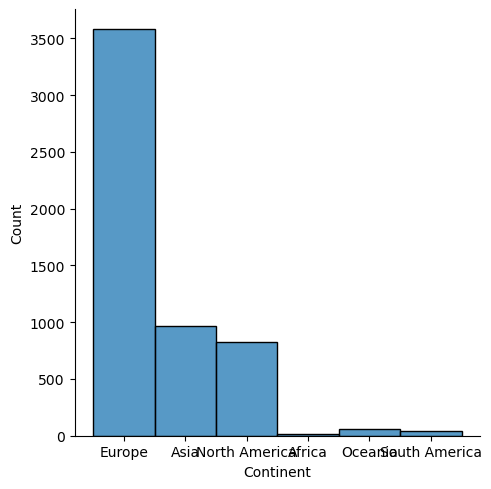

In [22]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
fig.suptitle("Univariate Analysis")
sns.displot(df['Rate'],ax=axes[0,0])
sns.displot(df['Stars'],ax=axes[1,0])
sns.displot(df['Km Freeride'],ax=axes[1,0])
sns.displot(df['Continent'],ax=axes[1,1])

c:\Users\Suchita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Suchita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Suchita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Suchita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

<Axes: xlabel='Continent', ylabel='Count'>

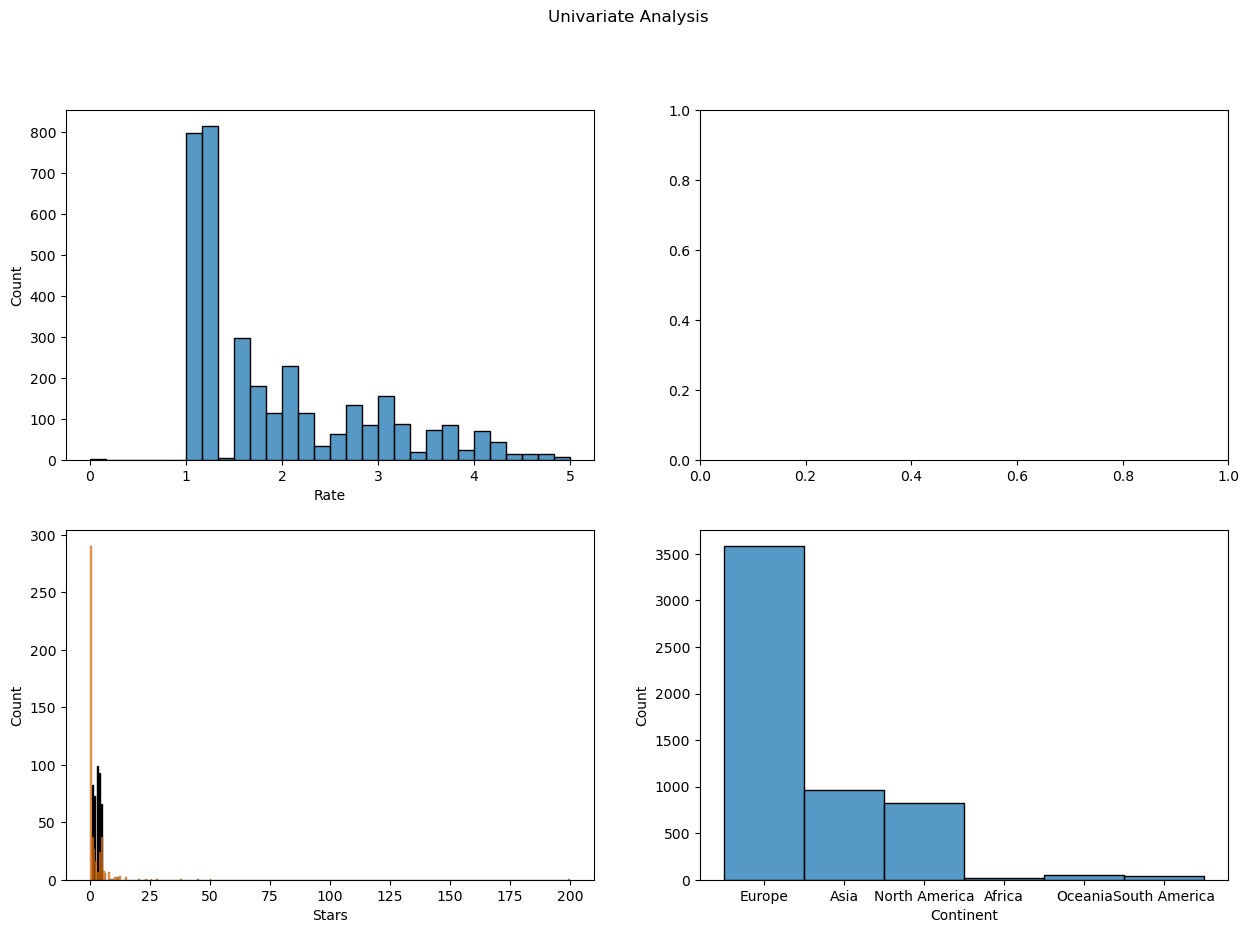

In [23]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
fig.suptitle("Univariate Analysis")
sns.histplot(df['Rate'],ax=axes[0,0])
sns.histplot(df['Stars'],ax=axes[1,0])
sns.histplot(df['Km Freeride'],ax=axes[1,0])
sns.histplot(df['Continent'],ax=axes[1,1])

Multi variant Analysis

In [24]:
resort_bycontinent=df.groupby(['Continent'],as_index=False)[['NameResort']].count().sort_values(by='NameResort',ascending=False)
resort_bycontinent=resort_bycontinent.rename(columns={'NameResort':'Count'})

<Axes: xlabel='Continent', ylabel='Count'>

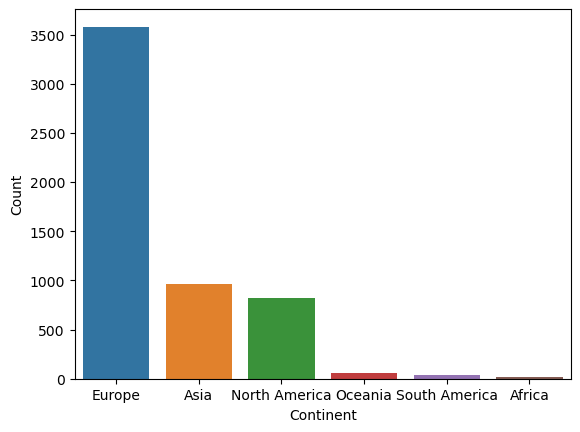

In [25]:
sns.barplot(x=resort_bycontinent['Continent'],y=resort_bycontinent['Count'])

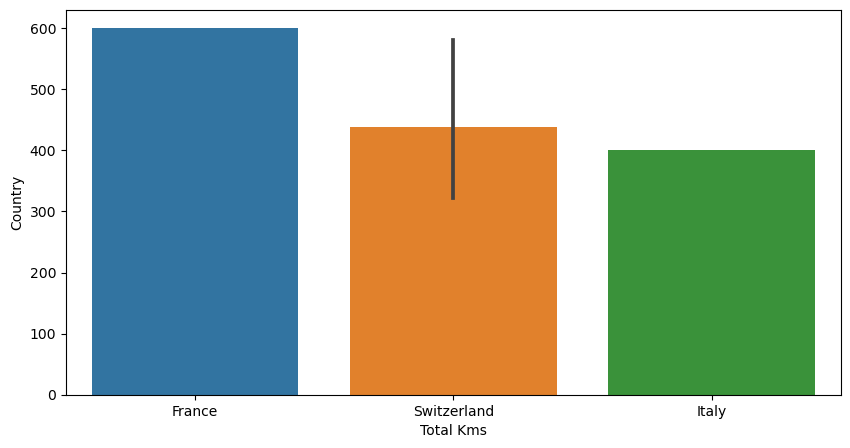

In [26]:
#Sort the das by Total Kms
total_Kms=df.sort_values(by='Total Kms',ascending=False)
sample=total_Kms.head(5)

#Display the top 15 countries with hign elevation ski resorts
plt.figure(figsize=(10,5))
sns.barplot(x="Country",y="Total Kms",data=sample,orient='v')
plt.xlabel('Total Kms')
plt.ylabel('Country')
plt.show()

<Axes: xlabel='Total Kms', ylabel='Rate'>

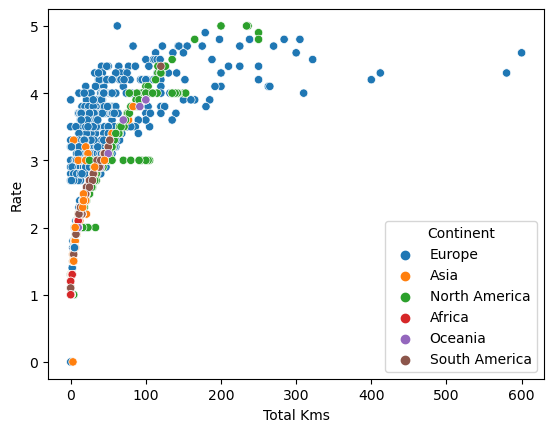

In [27]:
sns.scatterplot(x=df['Total Kms'],y=df['Rate'],hue=df['Continent'])


Index(['NameResort', 'Continent', 'Country', 'State/Province', 'Currency',
       'Ski resort size ', 'Lifts and cable cars ', 'Access, on-site parking ',
       'Orientation (trail map, information boards, sign-postings) ',
       'Cleanliness and hygiene ', 'Environmentally friendly ski operation ',
       'Mountain restaurants, ski huts, gastronomy ', 'Après-ski ',
       'Accommodation offering directly at the slopes and lifts ',
       'Families and children ', 'Beginners ', 'Snow parks ',
       'Cross-country skiing and trails '],
      dtype='object')


<Axes: >

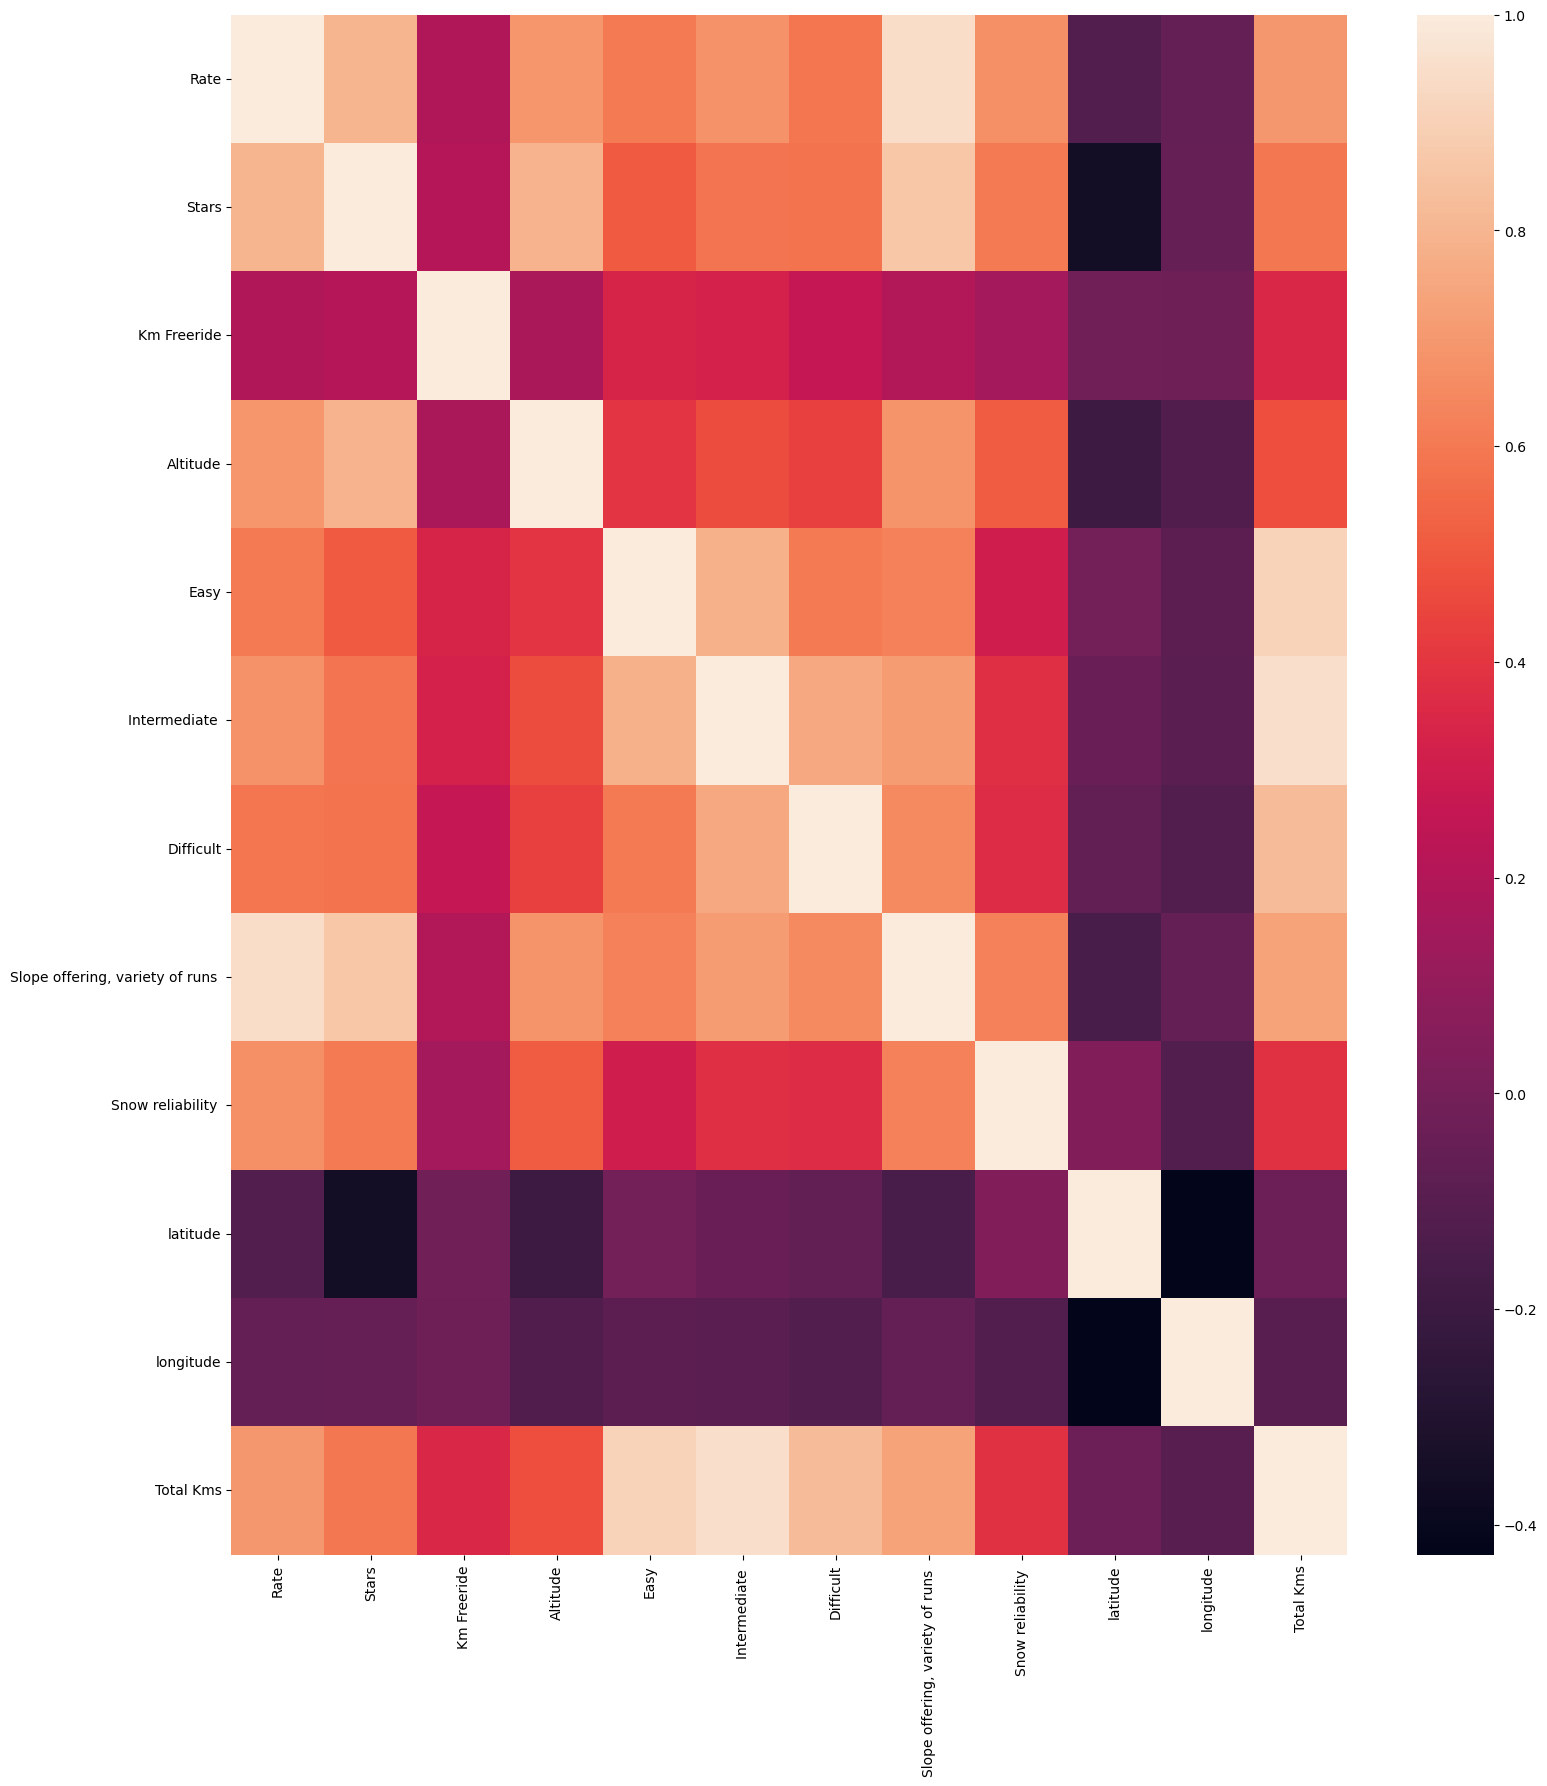

In [28]:
non_numeric_cols=df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)
df_numeric=df.drop(columns=non_numeric_cols)
df_cor=df_numeric.corr()
plt.figure(figsize=(18,20))
sns.heatmap(df_cor)

In [29]:
df.drop(['longitude','latitude','NameResort'],axis=1,inplace=True)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
ce=LabelEncoder()
ce.fit(df['Continent'])
df['Continent']=ce.transform(df['Continent'])

cne=LabelEncoder()
cne.fit(df['Country'])
df['Country']=cne.transform(df['Country'])


se=LabelEncoder()
se.fit(df['State/Province'])
df['State/Province']=se.transform(df['State/Province'])

cre=LabelEncoder()
cre.fit(df['Currency'])
df['Currency']=cre.transform(df['Currency'])



In [32]:
print(df.columns)


Index(['Rate', 'Stars', 'Km Freeride', 'Continent', 'Country',
       'State/Province', 'Altitude', 'Easy', 'Intermediate ', 'Difficult',
       'Currency', 'Ski resort size ', 'Slope offering, variety of runs ',
       'Lifts and cable cars ', 'Snow reliability ',
       'Access, on-site parking ',
       'Orientation (trail map, information boards, sign-postings) ',
       'Cleanliness and hygiene ', 'Environmentally friendly ski operation ',
       'Mountain restaurants, ski huts, gastronomy ', 'Après-ski ',
       'Accommodation offering directly at the slopes and lifts ',
       'Families and children ', 'Beginners ', 'Snow parks ',
       'Cross-country skiing and trails ', 'Total Kms'],
      dtype='object')


Scaling of Data

In [33]:
print(df.columns)
new=df[['Rate','Stars','Continent','Country',
        'State/Province','Altitude','Easy','Difficult',
        'Currency','Total Kms']]

Index(['Rate', 'Stars', 'Km Freeride', 'Continent', 'Country',
       'State/Province', 'Altitude', 'Easy', 'Intermediate ', 'Difficult',
       'Currency', 'Ski resort size ', 'Slope offering, variety of runs ',
       'Lifts and cable cars ', 'Snow reliability ',
       'Access, on-site parking ',
       'Orientation (trail map, information boards, sign-postings) ',
       'Cleanliness and hygiene ', 'Environmentally friendly ski operation ',
       'Mountain restaurants, ski huts, gastronomy ', 'Après-ski ',
       'Accommodation offering directly at the slopes and lifts ',
       'Families and children ', 'Beginners ', 'Snow parks ',
       'Cross-country skiing and trails ', 'Total Kms'],
      dtype='object')


In [34]:
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()
sc.fit(new)
new_df=sc.transform(new)

Hierarichal Analysis

In [35]:
#import the required module
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score
import numpy as np

#different linkage methods
methods=['ward','complete','average','single']
for method in methods:
  if not np.all(np.isfinite(new_df)):
    print(f'Warning: Non-finite values found in new_df. Replacing with median')
    col_median=np.nanmedian(new_df,axis=0)
    indices_to_replace=~np.isfinite(new_df)
    new_df[indices_to_replace]=col_median[np.where(indices_to_replace)[1]]

  Z=linkage(new_df, method=method)
  clusters=fcluster(Z,t=3,criterion='maxclust')
  silhouette_avg=silhouette_score(new_df,clusters)
  print(f'Silhouette Score for {method} linkage:{silhouette_avg}')



Silhouette Score for ward linkage:0.7439059126390966
Silhouette Score for complete linkage:0.9159696694412254
Silhouette Score for average linkage:0.9376936920556211
Silhouette Score for single linkage:0.9398730940058923


In [36]:
#different numbers of clusters
for num_clusters in range(2,11):
  Z=linkage(new_df, method='average')
  clusters=fcluster(Z,t=num_clusters,criterion='maxclust')
  silhouette_avg=silhouette_score(new_df,clusters)
  print(f'Silhouette Score for {num_clusters} clusters: {silhouette_avg}')


Silhouette Score for 2 clusters: 0.9567281113191908
Silhouette Score for 3 clusters: 0.9376936920556211
Silhouette Score for 4 clusters: 0.8966327751968093
Silhouette Score for 5 clusters: 0.8961032886964062
Silhouette Score for 6 clusters: 0.8704639777549112
Silhouette Score for 7 clusters: 0.8698948519538624
Silhouette Score for 8 clusters: 0.869418015864942
Silhouette Score for 9 clusters: 0.8448806929748456
Silhouette Score for 10 clusters: 0.8444379349726149


In [37]:
#different distance metrices
metrices=['euclidean','cityblock','cosine']


for metric in metrices:
  Z=linkage(new_df,method='average',metric=metric)
  clusters=fcluster(Z,t=2, criterion='maxclust')
  silhouette_avg=silhouette_score(new_df, clusters)
  print(f'Silhouette Score for {metric} distance metric: {silhouette_avg}')

Silhouette Score for euclidean distance metric: 0.9567281113191908
Silhouette Score for cityblock distance metric: 0.9480288540501113
Silhouette Score for cosine distance metric: 0.221604660726845


K Means clustring

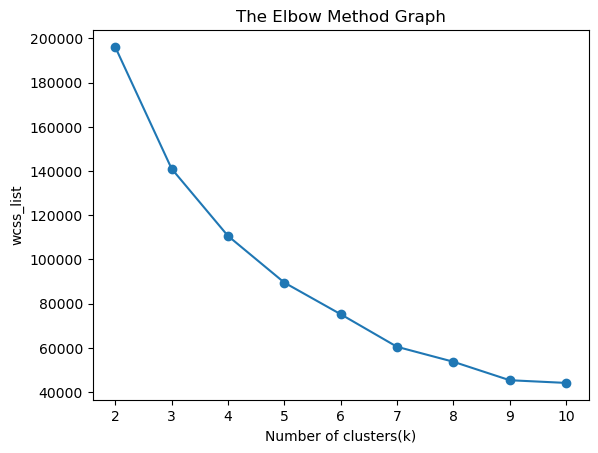

In [38]:
from sklearn.cluster import KMeans
wcss_list=[]

for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(new_df)
  wcss_list.append(kmeans.inertia_)
plt.plot(range(2,11),wcss_list,marker='o')
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [39]:
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(new_df)

KMeans(n_clusters=5, random_state=42)

In [40]:
cluster_assignments=pd.DataFrame(kmeans.labels_)

In [41]:
cluster_assignments.value_counts()

0    4685
3     610
2     132
1      33
4      18
Name: count, dtype: int64

In [42]:
y_kmeans=kmeans.fit_predict(new_df)

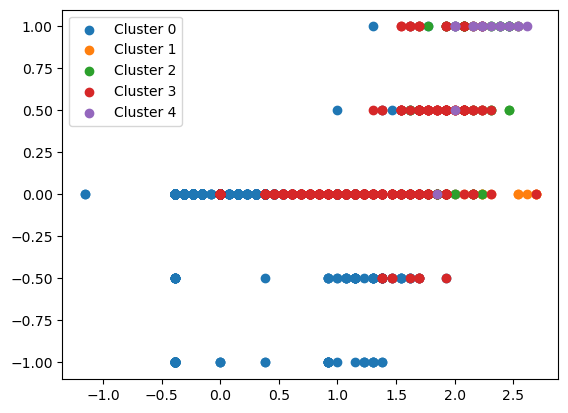

In [43]:
plt.scatter(new_df[y_kmeans==0,0],new_df[y_kmeans==0,1], label='Cluster 0')
plt.scatter(new_df[y_kmeans==1,0],new_df[y_kmeans==1,1], label='Cluster 1')
plt.scatter(new_df[y_kmeans==2,0],new_df[y_kmeans==2,1], label='Cluster 2')
plt.scatter(new_df[y_kmeans==3,0],new_df[y_kmeans==3,1], label='Cluster 3')
plt.scatter(new_df[y_kmeans==4,0],new_df[y_kmeans==4,1], label='Cluster 4')
plt.legend()

Splitting Dataset into Train and test sets

In [44]:
x=df[['Rate','Stars','Continent','Country',
        'State/Province','Altitude','Easy','Difficult',
        'Currency']]

y=df[['Total Kms']]

In [45]:
x_cor=x.corr()

<Axes: >

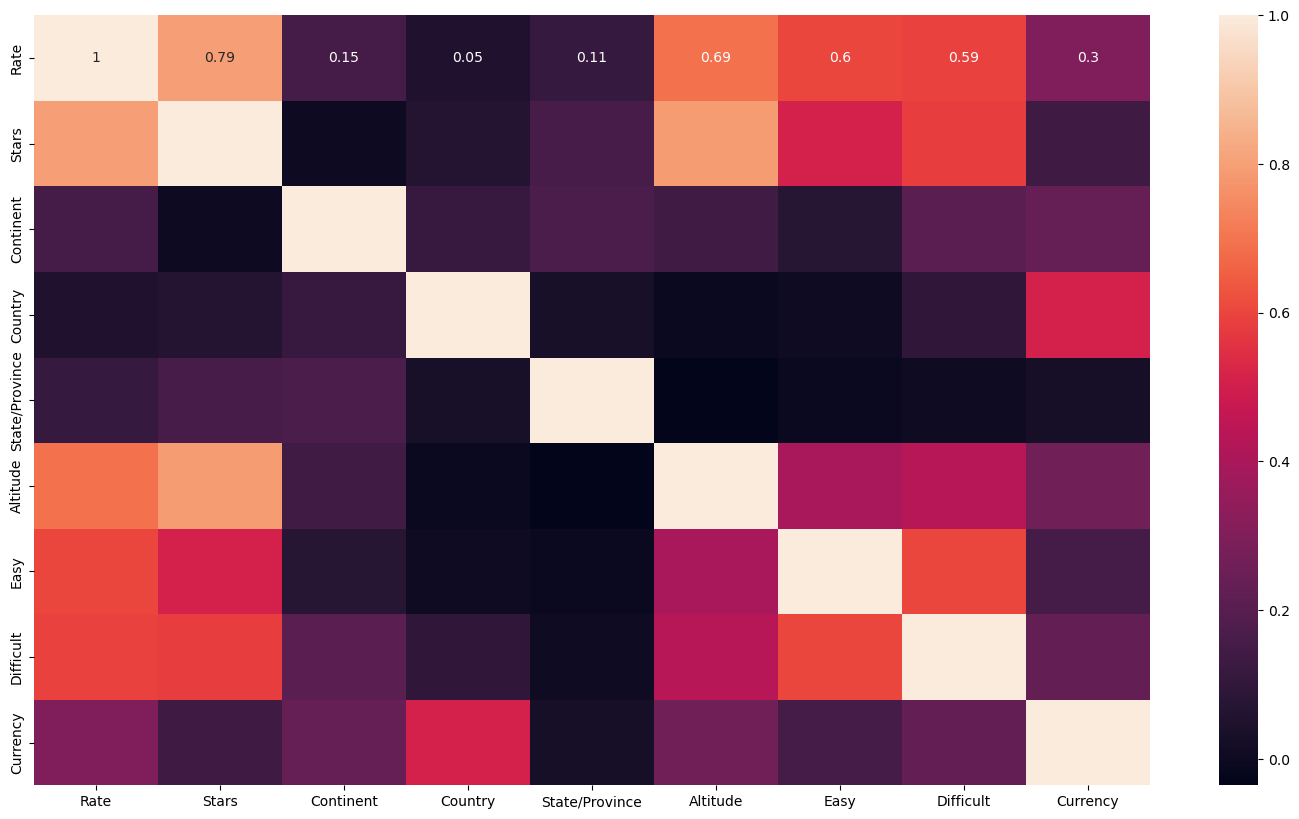

In [46]:
plt.figure(figsize=(18,10))
sns.heatmap(x_cor,annot=True)

Splitting The date

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Scaling the Data

In [48]:
rsc=RobustScaler()
rsc.fit(x_train)
x_train=rsc.transform(x_train)
x_test=rsc.transform(x_test)

**Module2(Model Building)**

Mean Actual Error

In [49]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='mean')
x_train=imputer.fit_transform(x_train)
x_test=imputer.transform(x_test)

LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [58]:
from sklearn.metrics import mean_absolute_error as mae,r2_score

In [51]:
y_pred=LR.predict(x_test)

In [59]:
error=mae(y_test,y_pred)
lr_score = r2_score(y_test, y_pred)

In [60]:
error
print(lr_score)

0.9697683875509797


Plotting Linear Regression line

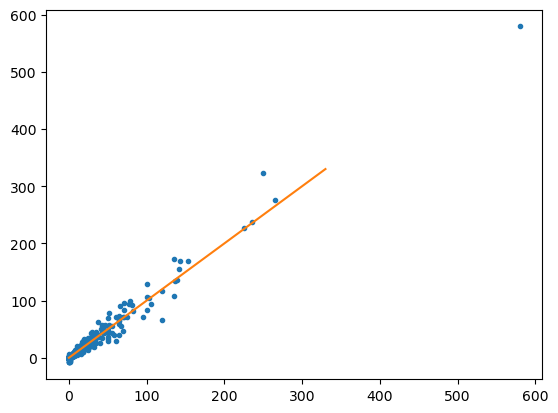

In [54]:
plt.plot(y_test,y_pred,'.')
x=np.linspace(0,330,100)
y_line=x
plt.plot(x,y_line)
plt.show()

**Module-3(Model deployment)**

Save the Best Model

In [55]:
import pickle as pkl

In [63]:
#saving the Best model
pkl.dump(LR,open("model.pkl",'wb'))